Data--> Data pre-processing --> Train Test Split--> Support Vector Machine Model--> New Data--> Trained Support Vector Machine Model --> Approved (or) Rejected (prediction)

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and Processing

In [4]:
# loading the dataset to pandas Dataframe
loan_dataset = pd.read_csv('loandataset.csv')

In [9]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [15]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [19]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
# dropping the missing value
loan_dataset = loan_dataset.dropna()

In [29]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
# label encoding
loan_dataset.replace({"Loan_Status": {'N':0,'Y':1}},inplace = True)

In [33]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [35]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [37]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace = '3+', value = 4)

In [39]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

Data Visualization


AttributeError: 'numpy.int64' object has no attribute 'startswith'

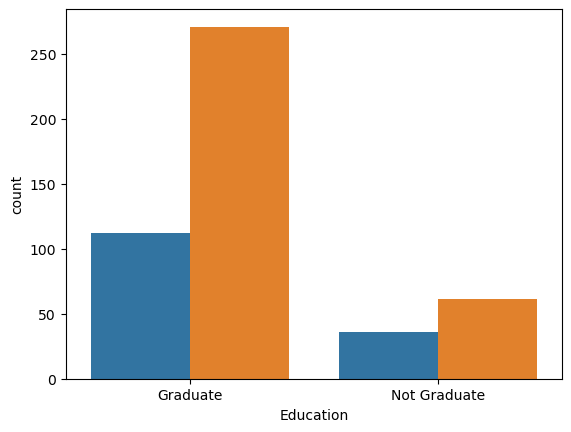

In [42]:
sns.countplot(x = 'Education', hue = 'Loan_Status', data = loan_dataset)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

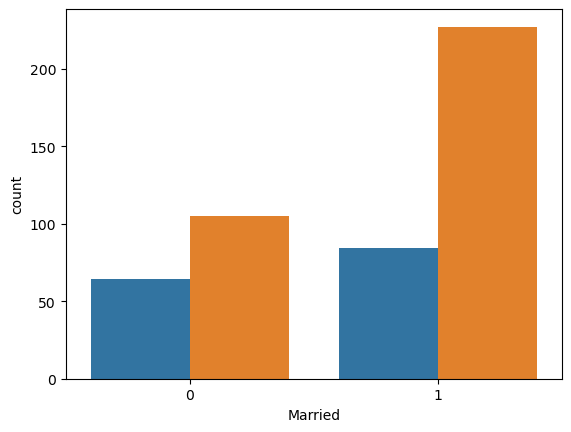

In [49]:
# marital status & loan status
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_dataset)

In [51]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married' : {'No':0, 'Yes' : 1}, 'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace = True)

In [53]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [55]:
# separating the data nad label
x = loan_dataset.drop(columns=['Loan_ID','Loan_Status'], axis = 1)
y = loan_dataset['Loan_Status']

In [57]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [59]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Train Test Split

In [62]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.1, stratify = y, random_state = 2)

In [64]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(432, 11) (48, 11) (432,) (48,)


Training the model:
Support Vector Machine Model

In [70]:
classifier = svm.SVC(kernel = 'linear')

In [71]:
# training the support vector machine model
classifier.fit(x_train, y_train)

SVC(kernel='linear')

Model Evaluation

In [75]:
# accuacy score on training data
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [77]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.7986111111111112


In [79]:
# accuacy score on training data
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [81]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8333333333333334


Making a Predictive System